# Summary statistics

### Branch lengths

- Max_H = 0.4187139080715566 
- Min_H = 0.07898788067423779


- Mean lengths = 0.024626764928399065
- Median lengths = 0.016550288168320965
- Variance in lengths = 0.0006479307331597084


- Mean external = 0.030683040421764732
- Median external = 0.022982686457671875
- Variance external = 0.0007669213909417984


- Mean internal = 0.01853712152597904
- Median internal = 0.012126822480269583
- Variance internal = 0.00045590389615045627


- Mean internal/external = 0.6041487828836514
- Median internal/external = 0.5276503468210313
- Variance internal/external = 0.5944597471594775

### Topology

 - Colless = 55126
 - Sackin = 6549
 - WD_Ratio = 0.7666666666666667
 - Delta_W = 9
 - max_ladder = 4
 - IL_nodes = 0.010958904109589041
 - staircase_1 = 0.0027472527472527475
 - staircase_2 = 0.6222222222222222


## Exploring Phylo

In [36]:
from Bio import Phylo
import numpy as np
import statistics
from collections import Counter
from collections import defaultdict

In [2]:
tree = Phylo.read("observed_tree.txt", 'newick')

In [3]:
print(tree)

Tree(rooted=False, weight=1.0)
    Clade(comment='&height_95%_HPD={0.3720055573816865,0.5076395426989975},l...')
        Clade(branch_length=0.045058540081309384, comment='&length_range={7.856846584108901E-5,0.22674998014596875},...')
            Clade(branch_length=0.0339293405929284, comment='&length_range={8.151348334373143E-6,0.09502031854756726},...', name='134')
            Clade(branch_length=0.010354796666622035, comment='&length_range={2.423572374632421E-5,0.07949309081298755},...')
                Clade(branch_length=-0.0021185499425958043, comment='&length_range={3.813666611097166E-4,0.06359531657981066},...')
                    Clade(branch_length=0.004206686985425534, comment='&length_range={7.590762762965664E-6,0.050387811729275644}...')
                        Clade(branch_length=0.02148640688347664, comment='&length_range={3.977753198127765E-4,0.09988369754135129},...', name='132')
                        Clade(branch_length=0.02148640688347664, comment='&length_range=

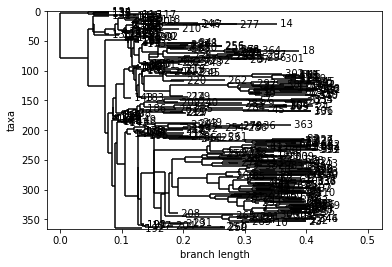

In [23]:
Phylo.draw(tree)

In [4]:
tips = tree.get_terminals()

In [5]:
len(tips)

365

In [6]:
nodes = tree.get_nonterminals()

In [7]:
len(nodes)

364

## Branch length stuff

In [8]:
path_lists = []

for tip in tips:
    path_lists.append(tree.get_path(tip))
    
path_lists

[[Clade(branch_length=0.045058540081309384, comment='&length_range={7.856846584108901E-5,0.22674998014596875},...'),
  Clade(branch_length=0.0339293405929284, comment='&length_range={8.151348334373143E-6,0.09502031854756726},...', name='134')],
 [Clade(branch_length=0.045058540081309384, comment='&length_range={7.856846584108901E-5,0.22674998014596875},...'),
  Clade(branch_length=0.010354796666622035, comment='&length_range={2.423572374632421E-5,0.07949309081298755},...'),
  Clade(branch_length=-0.0021185499425958043, comment='&length_range={3.813666611097166E-4,0.06359531657981066},...'),
  Clade(branch_length=0.004206686985425534, comment='&length_range={7.590762762965664E-6,0.050387811729275644}...'),
  Clade(branch_length=0.02148640688347664, comment='&length_range={3.977753198127765E-4,0.09988369754135129},...', name='132')],
 [Clade(branch_length=0.045058540081309384, comment='&length_range={7.856846584108901E-5,0.22674998014596875},...'),
  Clade(branch_length=0.010354796666622

In [9]:
path_lengths = []

for path in path_lists:
    path_len = 0
    for clade in path:
        path_len += clade.branch_length
        
    path_lengths.append(path_len)

In [10]:
max_H = max(path_lengths)
min_H = min(path_lengths)

print(max_H, min_H)

0.4187139080715566 0.07898788067423779


In [11]:
branch_lengths = []
internal_branches = []
external_branches = []

for tip in tips:
    branch_lengths.append(tip.branch_length)
    external_branches.append(tip.branch_length)
    
    if tip.branch_length == None:
        print(tip)

for node in nodes:
    
    if node.branch_length:
    
        branch_lengths.append(node.branch_length)
        internal_branches.append(node.branch_length)
    
        

In [12]:
branch_lengths

[0.0339293405929284,
 0.02148640688347664,
 0.02148640688347664,
 0.025693093868902173,
 0.04340681716538991,
 0.009162713348367213,
 0.003683261293652429,
 0.024892000225981703,
 0.013059341849817385,
 0.008065681214598719,
 0.004446500578563162,
 0.0017067745512057697,
 0.0028030585771212646,
 0.030200318851149932,
 0.0029955425790637036,
 0.0028687447172905944,
 0.02752627896396187,
 0.010799065069264424,
 0.016278517123979208,
 0.04831425298459374,
 0.17708137627221016,
 0.07165895889404814,
 0.011384986291276017,
 0.002120532738133951,
 0.002305563130672983,
 0.002305563130672983,
 0.004727414943626385,
 0.010206866998341169,
 0.004630960653113136,
 0.06573333488163008,
 0.002719636251500568,
 0.004650678416204812,
 0.00191095238884742,
 0.005867538565458241,
 0.008693633200433648,
 0.01965253731009059,
 0.002875566137922947,
 0.009549128636812398,
 0.00542660511717602,
 0.04027732516620319,
 0.003985130080021382,
 0.03138239035405005,
 0.021377954013324874,
 0.013158775931025324,

In [13]:
statistics.mean(branch_lengths)

0.024626764928399065

In [14]:
statistics.variance(branch_lengths)

0.0006479307331597084

In [15]:
statistics.median(branch_lengths)

0.016550288168320965

In [16]:
statistics.mean(external_branches)
statistics.median(external_branches)
statistics.variance(external_branches)

0.0007669213909417984

In [17]:
statistics.mean(internal_branches)
#statistics.median(internal_branches)
#statistics.variance(internal_branches)

0.01853712152597904

In [18]:
statistics.variance(internal_branches)/statistics.variance(external_branches)

0.5944597471594775

## Topology set

In [52]:
colless = 0

for node in nodes:
    total_path = 0
    path = tree.get_path(node)
    for clade in path:
        total_path += clade.branch_length
        
    
    right = np.sum(i > total_path for i in path_lengths)
    left = np.sum(i <= total_path for i in path_lengths)
    
    difference = abs(left - right)
    
    colless += difference
    
    uneven = 0
    sum_ratios = []
    
    if right != left:
        uneven += 1

    if left<right:
        ratio = left/right
    elif right<left:
        ratio = right/left
    else:
        ratio = 1

    sum_ratios.append(ratio)
        
    staircase_1 = uneven/len(nodes)

    staircase_2 = np.mean(sum_ratios)
    
print(colless)
print(staircase_1)
print(staircase_2)

55126
0.0027472527472527475
0.6222222222222222


In [20]:
total_steps = 0
step_list = []

for path in path_lists:
    steps = len(path) #This includes the tip but not the root, so the number is actually right
    step_list.append(steps)
    total_steps += steps
    
print(total_steps)

6549


In [21]:
print(path_lists[1])

[Clade(branch_length=0.045058540081309384, comment='&length_range={7.856846584108901E-5,0.22674998014596875},...'), Clade(branch_length=0.010354796666622035, comment='&length_range={2.423572374632421E-5,0.07949309081298755},...'), Clade(branch_length=-0.0021185499425958043, comment='&length_range={3.813666611097166E-4,0.06359531657981066},...'), Clade(branch_length=0.004206686985425534, comment='&length_range={7.590762762965664E-6,0.050387811729275644}...'), Clade(branch_length=0.02148640688347664, comment='&length_range={3.977753198127765E-4,0.09988369754135129},...', name='132')]


In [22]:
widths = Counter(step_list)

In [23]:
widths

Counter({2: 1,
         5: 5,
         4: 3,
         9: 10,
         10: 16,
         11: 13,
         17: 13,
         18: 16,
         15: 14,
         14: 23,
         12: 22,
         6: 11,
         3: 1,
         7: 5,
         13: 14,
         19: 20,
         16: 9,
         8: 5,
         20: 14,
         22: 22,
         25: 17,
         27: 18,
         28: 13,
         24: 18,
         21: 15,
         23: 23,
         26: 17,
         29: 5,
         30: 2})

In [24]:
max_depth = max(widths)
max_width = widths.most_common()[0][1]

WD_ratio = max_width/max_depth

#delta_w

tup_list = []

for k,v in widths.items():
    tup = (k,v)
    tup_list.append(tup)

sorted_widths = sorted(tup_list, key=lambda tup:tup[0])

difference = 0

for index, tup in enumerate(sorted_widths):
    if index > 0:
        new_difference =  abs(tup[1] - sorted_widths[index-1][1])
        if new_difference > difference:
            difference = new_difference

delta_w = difference

In [25]:
print(WD_ratio)

0.7666666666666667


In [26]:
print(delta_w)

9


In [28]:
for i in tips:
    if not i.name:
        print(i)

In [38]:
def all_parents(tree):
    parents = {}
    child_dict = defaultdict(list)
    for clade in tree.find_clades(order='level'):
        for child in clade:
            parents[child] = clade
            child_dict[clade].append(child)
    return parents, child_dict

# Example
parents, child_dict = all_parents(tree)
#myclade = tree.find_clades("foo").next()
#parent_of_myclade = parents[myclade]


In [44]:
def go_up_ladder(nde, ladder_count, count_list):
    
    children = child_dict[nde]
    
    if (children[0].name and not children[1].name) or (children[1].name and not children[0].name):

        ladder_count += 1
        
        for i in children:
            if not i.name:
                go_up_ladder(i, ladder_count, count_list)
                
    else:
        
        count_list.append(ladder_count)
        
    return

In [46]:
count_list = []

for nde in nodes:

    ladder_count = 0

    go_up_ladder(nde, ladder_count, count_list)

longest_ladder = max(count_list)

ladder_likeness = longest_ladder/len(tips)

In [47]:
longest_ladder

4

In [48]:
ladder_likeness

0.010958904109589041